# Link

In [ ]:
import warnings
warnings.simplefilter("ignore")
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

url = "https://web.archive.org/web/20230224123642/https://www.ibm.com/us-en/"
data  = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")  # create a soup object using the variable 'data'
for link in soup.find_all('a',href=True):  # in html anchor/link is represented by the tag <a>
    print(link.get('href'))

https://web.archive.org/web/20230224123642/https://www.ibm.com/reports/threat-intelligence/
https://web.archive.org/web/20230224123642/https://www.ibm.com/about
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/strategy/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/ibmix?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/technology/
https://web.archive.org/web/20230224123642/https://www.ibm.com/consulting/operations/?lnk=flathl
https://web.archive.org/web/20230224123642/https://www.ibm.com/strategic-partnerships
https://web.archive.org/web/20230224123642/https://www.ibm.com/employment/?lnk=flatitem
https://web.archive.org/web/20230224123642/https://www.ibm.com/impact
https://web.archive.org/web/20230224123642/https://research.ibm.com/
https://web.archive.org/web/20230224123642/https://www.ibm.com/


In [ ]:
for link in soup.find_all('img'):# in html image is represented by the tag <img>
    print(link)
    print(link.get('src'))

<img alt="Person standing with arms crossed" aria-describedby="bx--image-1" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/0a23e414312bcb6f/08196d0e04260ae5_cropped.jpg.global.sr_16x9.jpg
<img alt="Team members at work in a conference room" aria-describedby="bx--image-2" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg"/>
https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/06655c075aa3aa29/CaitOppermann_2019_12_06_IBMGarage_DSC3304.jpg.global.m_16x9.jpg
<img alt="Coworkers looking at laptops" aria-describedby="bx--image-3" class="bx--image__img" src="https://web.archive.org/web/20230224123642im_/https://1.dam.s81c.com/p/08f951353c2707b8/052022_CaitOp

# Table

In [ ]:
import pandas as pd
#The below url contains html tables with data about world population.
url = "https://en.wikipedia.org/wiki/World_population"
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>
len(tables)

27

In [ ]:
for index,table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)

6


In [ ]:
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_103-0">
   <a href="#cite_note-:10-103">
    <span class="cite-bracket">
     [
    </span>
    98
    <span class="cite-bracket">
     ]
    </span>
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <span>
       <img alt="" class="mw-file-element" data-file-height="600" data-fi

In [ ]:
population_data = pd.DataFrame(columns=["Rank", "Country", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        rank = col[0].text.strip()
        country = col[1].text.strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        density = col[4].text.strip()

        # Create a temporary DataFrame for the new row
        new_row = pd.DataFrame([{"Rank": rank, "Country": country, "Population": population, "Area": area, "Density": density}])

        # Use concat
        population_data = pd.concat([population_data, new_row], ignore_index=True)

population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,Palestine[note 3][99],"5,223,000","6,025",867
3,4,Taiwan[note 4],"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520
5,6,Lebanon,"5,296,814","10,400",509
6,7,Rwanda,"13,173,730","26,338",500
7,8,Burundi,"12,696,478","27,830",456
8,9,Israel,"9,402,617","21,937",429
9,10,India,"1,389,637,446","3,287,263",423


# Analysis

In [ ]:
import yfinance as yf
import pandas as pd
import json

apple = yf.Ticker("AAPL")
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

with open('apple.json') as json_file:
    apple_info = json.load(json_file)
apple_info

--2025-04-07 08:20:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-04-07 08:20:13 (2.54 GB/s) - ‘apple.json’ saved [5699/5699]



{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [ ]:
apple_info['country']

'United States'

In [ ]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098726,0.099155,0.098726,0.098726,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094005,0.094005,0.093575,0.093575,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087136,0.087136,0.086707,0.086707,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088853,0.089282,0.088853,0.088853,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091429,0.091858,0.091429,0.091429,73449600,0.0,0.0


<Axes: xlabel='Date'>

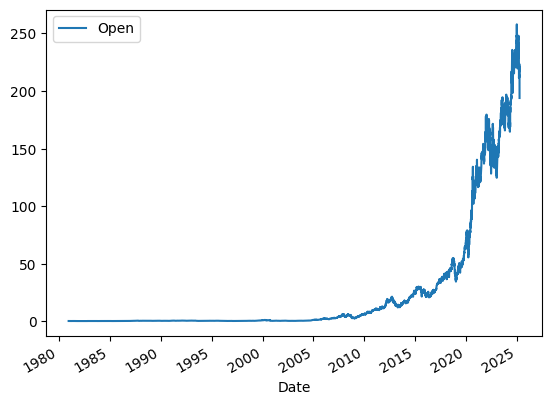

In [ ]:
apple_share_price_data.reset_index(inplace=True)
apple_share_price_data.plot(x="Date", y="Open")

In [ ]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2024-02-09 00:00:00-05:00,0.240000
2024-05-10 00:00:00-04:00,0.250000
2024-08-12 00:00:00-04:00,0.250000


<Axes: xlabel='Date'>

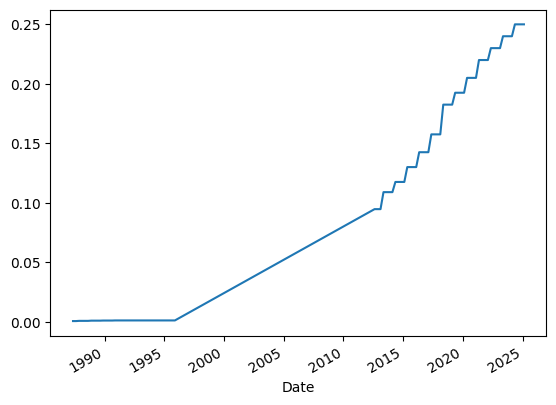

In [ ]:
apple.dividends.plot()

In [ ]:
import yfinance as yf
import pandas as pd
import json

amd = yf.Ticker('AMD')
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
amd_info

--2025-04-07 08:27:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.2’

amd.json.2          100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-04-07 08:27:56 (1.73 GB/s) - ‘amd.json.2’ saved [5838/5838]



{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [ ]:
amd_info['country']

'United States'

In [ ]:
amd_info['sector']

'Technology'

# Web_Scraping

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
data  = requests.get(url).text
# print(data)

soup = BeautifulSoup(data, 'html.parser')
# soup

netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
netflix_data

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text

    # Finally we append the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
netflix_data
netflix_data.head()
netflix_data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,"488,193,200",91.84
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,"319,939,200",114.38
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,"320,321,800",123.33
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,"446,204,400",108.38
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,"497,401,200",103.26


In [ ]:
read_html_pandas_data = pd.read_html(url)
# read_html_pandas_data = pd.read_html(str(soup))
netflix_dataframe = read_html_pandas_data[0]

netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


# New Section

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe"
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))